# Task # 3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing libraries

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # for data visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # for data visualization

## Importing data into a pandas dataframe

In [2]:
data = sns.load_dataset('iris')

## Exploring data

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Total no of Rows and Coloumns
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Finding null values in data  
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


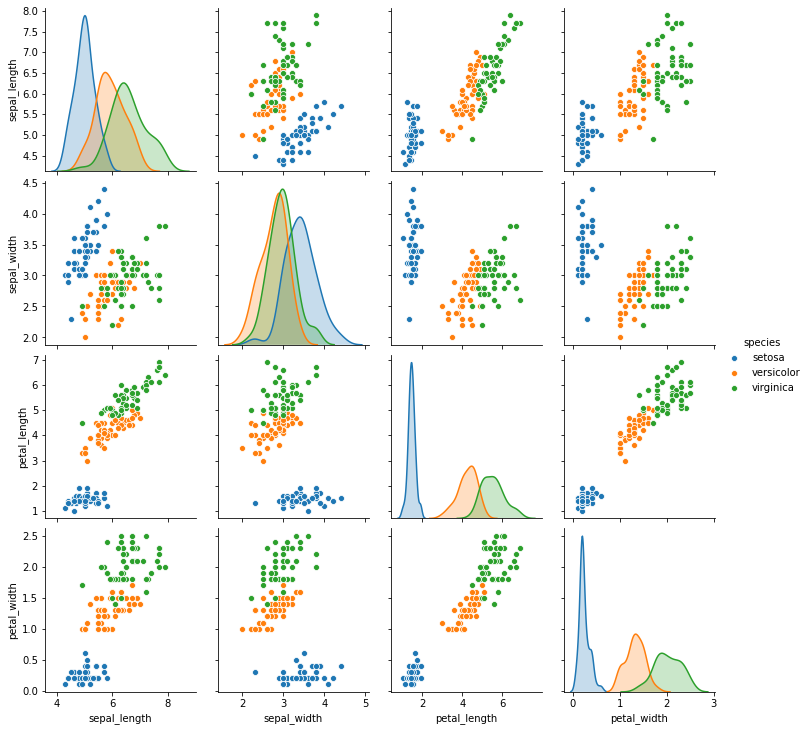

In [8]:
sns.pairplot(data=data,hue='species')

<AxesSubplot:>

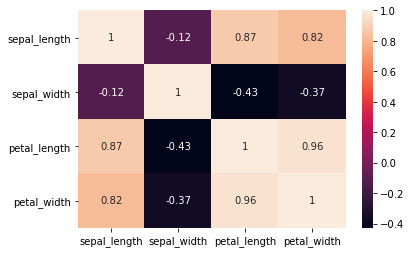

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
from sklearn.cluster import KMeans

In [11]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [12]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

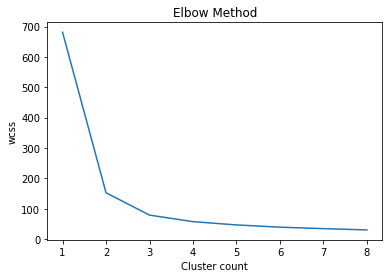

In [13]:
plt.plot(range(1, 9), wcss)
plt.xlabel("Cluster count")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show

#### This shows that the optimal cluster count is 3

In [14]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

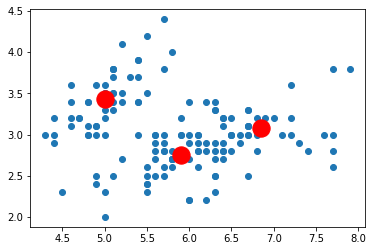

In [15]:
#Visualising the clusters
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

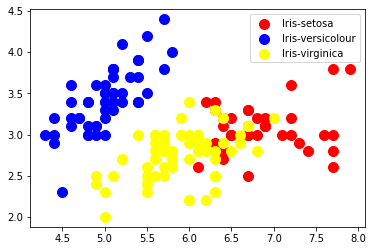

In [16]:
#for more detailed visuallizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.legend()

#### Visual representation of clusters.